1263 films correspondent au genre Adventure.
611 films correspondent au genre Animation.
664 films correspondent au genre Children.
3756 films correspondent au genre Comedy.
779 films correspondent au genre Fantasy.
1596 films correspondent au genre Romance.
4361 films correspondent au genre Drama.
1828 films correspondent au genre Action.
1199 films correspondent au genre Crime.
1894 films correspondent au genre Thriller.
978 films correspondent au genre Horror.
573 films correspondent au genre Mystery.
980 films correspondent au genre Sci-Fi.
382 films correspondent au genre War.
334 films correspondent au genre Musical.
440 films correspondent au genre Documentary.
158 films correspondent au genre IMAX.
167 films correspondent au genre Western.
87 films correspondent au genre Film-Noir.
34 films correspondent au genre (no genres listed).
/opt/venv/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.

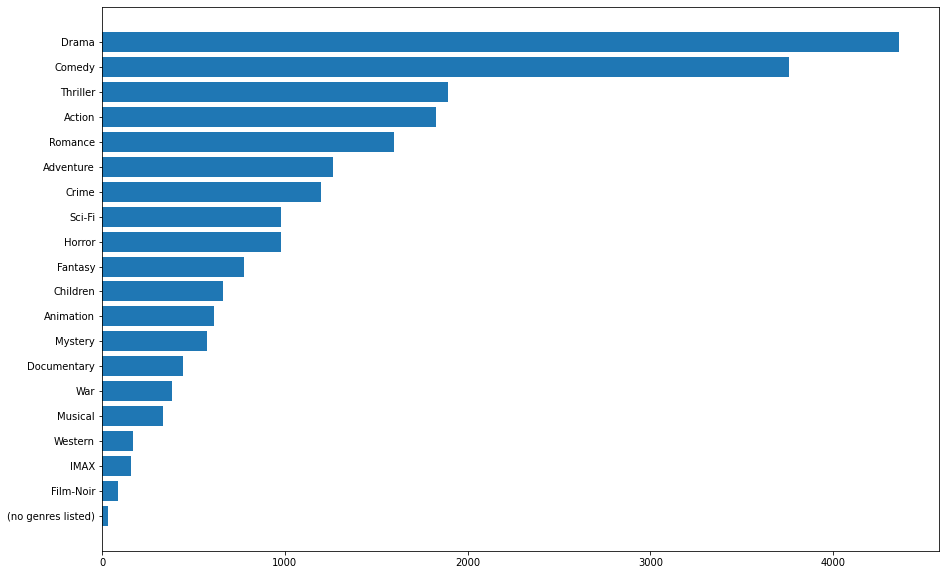

5.72% des films correspondent au genre Adventure.
2.77% des films correspondent au genre Animation.
3.01% des films correspondent au genre Children.
17.01% des films correspondent au genre Comedy.
3.53% des films correspondent au genre Fantasy.
7.23% des films correspondent au genre Romance.
19.75% des films correspondent au genre Drama.
8.28% des films correspondent au genre Action.
5.43% des films correspondent au genre Crime.
8.58% des films correspondent au genre Thriller.
4.43% des films correspondent au genre Horror.
2.59% des films correspondent au genre Mystery.
4.44% des films correspondent au genre Sci-Fi.
1.73% des films correspondent au genre War.
1.51% des films correspondent au genre Musical.
1.99% des films correspondent au genre Documentary.
0.72% des films correspondent au genre IMAX.
0.76% des films correspondent au genre Western.
0.39% des films correspondent au genre Film-Noir.
0.15% des films correspondent au genre (no genres listed).
Toy Story (1995)
['I.Q. (1994)

In [ ]:
%run sys_1_genres.ipynb

In [ ]:
df.head()

,movieId,title,genres,nombre_genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,2,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def recommand_5(movie):

    neigh = NearestNeighbors(n_neighbors=6) # on cherche les 5 plus proches voisins (5+lui-meme donc n_neighbors=6)

    neigh.fit(df.iloc[:,4:]) #on prend les colonnes binaires correspondants aux genres

    input_movie = np.array(df[df['title']==movie])[:,4:] #on cree un array a partir du film donné en input

    neigh.kneighbors(input_movie) #on applique la fonction kneighbors pour trouver les 5 plus proches. Elle nous ressort un array
                                    #avec les distances et un array avec les 5 plus proches + lui-meme

    index_closest = list(neigh.kneighbors(input_movie)[1][0,0:]) #on cree une liste d'index avec les 6 plus proches (dont lui-meme) à partir de l'array

    if df[df['title'] == movie].index.isin(index_closest):
        index_closest.remove(df[df['title'] == movie].index) #on supprime l'index qui correspond a lui meme s'il est dans la liste
    else:
        index_closest = list(neigh.kneighbors(input_movie)[1][0,:5]) #sinon, on sélectionne les 5 premiers index de la liste

    liste_recommandations = list(df[df.index.isin(index_closest)].iloc[:,1]) #on va chercher les titre de films correspondants aux 5 index restants
                                                                            #et on les stocke dans une liste
    
    return liste_recommandations


print(recommand_5('Grumpier Old Men (1995)'))

['I.Q. (1994)', 'Barcelona (1994)', "She's the One (1996)", 'Better Off Dead... (1985)', 'When Harry Met Sally... (1989)']


In [ ]:
#essai fonction input

def input_sys_1():
    movie = str(input('Veuillez saisir un film que vous avez déjà vu et aimé : '))
    return recommand_5(movie)

In [ ]:
input_sys_1()

['Grumpier Old Men (1995)',
 'I.Q. (1994)',
 "She's the One (1996)",
 'Better Off Dead... (1985)',
 'When Harry Met Sally... (1989)']

In [ ]:
#import de links

links = pd.read_csv('/home/jovyan/work/Data-Small/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
#merge entre movies et links

df.shape

(9742, 24)

In [ ]:
links.shape

(9742, 3)

In [ ]:
#les deux dataframes contiennent le même nombre de lignes
#on fait un outer join dans un premier temps pour voir si on perd des films

In [ ]:
links_movies = pd.merge(df, links, how='outer', left_on = 'movieId', right_on='movieId')
links_movies.head()

,movieId,title,genres,nombre_genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,2,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,113041,11862.0


In [ ]:
links_movies.to_csv('links_movies.csv')

In [ ]:
#on checke les NaN pour voir si on a perdu des films
links_movies.isna().sum()

movieId               0
title                 0
genres                0
nombre_genres         0
Adventure             0
Animation             0
Children              0
Comedy                0
Fantasy               0
Romance               0
Drama                 0
Action                0
Crime                 0
Thriller              0
Horror                0
Mystery               0
Sci-Fi                0
War                   0
Musical               0
Documentary           0
IMAX                  0
Western               0
Film-Noir             0
(no genres listed)    0
imdbId                0
tmdbId                8
dtype: int64

In [ ]:
links_movies.shape
#cela semble ok.

(9742, 26)

Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,imdbId,tmdbId

movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.

imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.

tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>

In [ ]:
#D'après ces informations, on comprend que les nombres contenus dans les colonnes imdbId et tmdbId sont la fin des url http://www.imdb.com/title/tt0114709/ et
#https://www.themoviedb.org/movie/862

#Exemple : pour Toy Story (1995)

links_movies[links_movies['title'] == 'Toy Story (1995)'].iloc[:,-2:]

#ceci peut nous servir pour l'affichage de l'output (liste des 5 films recommandés)

,imdbId,tmdbId
0,114709,862.0


In [ ]:
#TEST

#on récupère le nombre
imdbId = int(links_movies[links_movies['title'] == 'Toy Story (1995)']['imdbId'])
print(imdbId)


#on l'ajoute a la base de l'url

url_imbd = 'http://www.imdb.com/title/tt'+'0'+str(imdbId)+'/'
print(url_imbd)

114709
http://www.imdb.com/title/tt0114709/


In [ ]:
#fonction pour recuperer l'url

def catch_url_test(movie):
    imdbId = links_movies[links_movies['title'] == movie]['imdbId']
    url_imbd = 'http://www.imdb.com/title/tt'+'0'+str(imdbId)+'/'
    return url_imbd


In [ ]:
#test fonction url
catch_url_test('Toy Story (1995)')

'http://www.imdb.com/title/tt00    114709\nName: imdbId, dtype: int64/'

In [ ]:
#on essaie d'ouvrir l'url obtenu dans un nouvel onglet du navigateur
import webbrowser

webbrowser.open('http://www.imdb.com/title/tt0114709/',new = 1)

#fonctionne sur jupyter notebook mais pas sur deepnote car le browser fonctionne en local

False

In [ ]:
#on arrive à récupérer l'url de l'affiche grace au code ci-dessous :

from linkpreview import link_preview

preview = link_preview("http://www.imdb.com/title/tt0114709/")
print("title:", preview.title)
print("description:", preview.description)
print("image:", preview.image)
print("force_title:", preview.force_title)
print("absolute_image:", preview.absolute_image)

title: Toy Story (1995) - IMDb
description: Directed by John Lasseter.  With Tom Hanks, Tim Allen, Don Rickles, Jim Varney. A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy's room.
image: https://m.media-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UY1200_CR87,0,630,1200_AL_.jpg
force_title: Toy Story (1995) - IMDb
absolute_image: https://m.media-amazon.com/images/M/MV5BMDU2ZWJlMjktMTRhMy00ZTA5LWEzNDgtYmNmZTEwZTViZWJkXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_UY1200_CR87,0,630,1200_AL_.jpg


FONCTIONS

In [ ]:
#fonction de recommandation
def recommand_5(movie):

    neigh = NearestNeighbors(n_neighbors=6) # on cherche les 5 plus proches voisins (5+lui-meme donc n_neighbors=6)

    neigh.fit(df.iloc[:,4:]) #on prend les colonnes binaires correspondants aux genres

    input_movie = np.array(df[df['title']==movie])[:,4:] #on cree un array a partir du film donné en input

    neigh.kneighbors(input_movie) #on applique la fonction kneighbors pour trouver les 5 plus proches. Elle nous ressort un array
                                    #avec les distances et un array avec les 5 plus proches + lui-meme

    index_closest = list(neigh.kneighbors(input_movie)[1][0,0:]) #on cree une liste d'index avec les 6 plus proches (dont lui-meme) à partir de l'array

    if df[df['title'] == movie].index.isin(index_closest):
        index_closest.remove(df[df['title'] == movie].index) #on supprime l'index qui correspond a lui meme s'il est dans la liste
    else:
        index_closest = list(neigh.kneighbors(input_movie)[1][0,:5]) #sinon, on sélectionne les 5 premiers index de la liste

    liste_recommandations = list(df[df.index.isin(index_closest)].iloc[:,1]) #on va chercher les titre de films correspondants aux 5 index restants
                                                                            #et on les stocke dans une liste
    
    return liste_recommandations

In [ ]:
#test de la fonction de recommandation
recommand_5('Grumpier Old Men (1995)')

['I.Q. (1994)',
 'Barcelona (1994)',
 "She's the One (1996)",
 'Better Off Dead... (1985)',
 'When Harry Met Sally... (1989)']

In [ ]:
#fonction input qui nous ressort une liste de film en fonction de l'input (on reprend la fonction recommand_5)

def input_sys_1():
    movie = str(input('Veuillez saisir un film que vous avez déjà vu et aimé : '))
    liste_movie = recommand_5(movie)
    return liste_movie

In [ ]:
#test fonction
liste_movie = input_sys_1()
liste_movie

['Grumpier Old Men (1995)',
 'I.Q. (1994)',
 "She's the One (1996)",
 'Better Off Dead... (1985)',
 'When Harry Met Sally... (1989)']

In [ ]:
#probleme sur le premier url dans la fonction ci-dessous

#il faut 2 zeros > on peut utiliser z fill pour remplir les zeros dans la colonne imdbId

#on commence par transformer le type de la colonne imdbId
links_movies['imdbId'] = links_movies['imdbId'].astype(str)

#on remplit de zeros
links_movies['imdbId'] = links_movies['imdbId'].apply(lambda x: x.zfill(7))

links_movies['imdbId']

0       0114709
1       0113497
2       0113228
3       0114885
4       0113041
         ...   
9737    5476944
9738    5914996
9739    6397426
9740    8391976
9741    0101726
Name: imdbId, Length: 9742, dtype: object

In [ ]:
a = links_movies[links_movies['title'] == 'Return to Oz (1985)']['imdbId']
a

1556    0089908
Name: imdbId, dtype: object

In [ ]:
a.iloc[0]

'0089908'

In [ ]:
#fonction catch_url pour récupérer les url d'une liste de film

def catch_url(liste_movie):
    liste_url = []
    for i in liste_movie:
        imdbId = links_movies[links_movies['title'] == i]['imdbId']
        imdbId = imdbId.iloc[0]
        url_imbd = 'http://www.imdb.com/title/tt'+ imdbId +'/'
        liste_url.append(url_imbd)
    return liste_url

In [ ]:
#test fonction
liste_url  = catch_url(liste_movie)
liste_url

['http://www.imdb.com/title/tt0113228/',
 'http://www.imdb.com/title/tt0110099/',
 'http://www.imdb.com/title/tt0117628/',
 'http://www.imdb.com/title/tt0088794/',
 'http://www.imdb.com/title/tt0098635/']

In [ ]:
#fonction get_image_test pour récupérer l'url de l'affiche en fonction de l'url imbd et l'afficher

#import des librairies
from PIL import Image
import requests
from io import BytesIO

def get_image_test(url):
    preview = link_preview(url)
    link_image = preview.image
    response = requests.get(link_image)
    image = Image.open(BytesIO(response.content))
    image = image.resize((170, 290), Image.ANTIALIAS)          
    return image


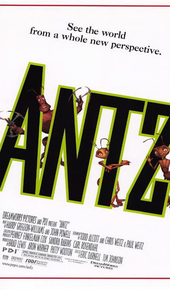

In [ ]:
#test fonction
get_image_test('http://www.imdb.com/title/tt0120587/')

In [ ]:
#fonction get_image pour une liste d'url pour afficher les images des 5 films recommandés dans une figure matplotlib

#import des librairies
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

def get_display_image(liste_url):
    liste_image = []
    for url in liste_url:
        preview = link_preview(url)
        link_image = preview.image #on crée le lien de l'image
        response = requests.get(link_image) #on récupère le lien de l'image
        image = Image.open(BytesIO(response.content)) #on ouvre l'image en tant que fichier à partir de son lien (on la transforme en fichier binaire)
        image = image.resize((170, 290), Image.ANTIALIAS) #on ajuste la taille de l'image
        liste_image.append(image)  #on cree une liste avec les objects images des 5 affiches

    fig, ax = plt.subplots(1,5,figsize = (25,7)) #on crée une figure pour afficher les 5 images cote à cote
    for i in range(len(liste_image)):
        imagebox = OffsetImage(liste_image[i], zoom=1.3) #on annote chaque subplot avec une image
        ab = AnnotationBbox(imagebox, (0.4, 0.6))  
        ax[i].add_artist(ab)
        ax[i].axis('off') #on fait disparaitre l'arriere plan grille

    return plt.show()



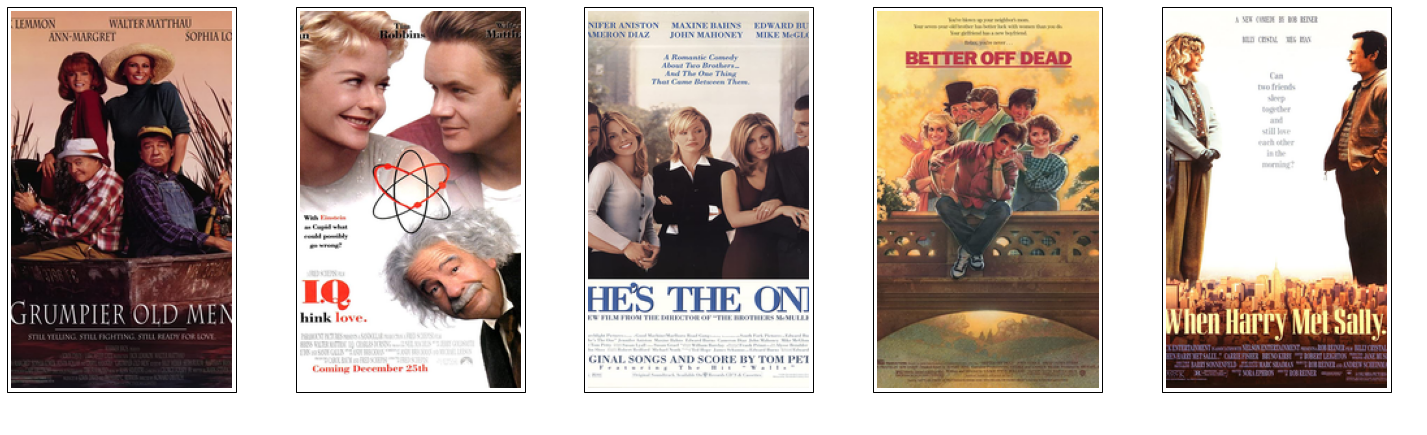

In [ ]:
#test fonction
liste_image = get_display_image(liste_url)
liste_image

In [ ]:
#test pour inserer une image dans une figure

#from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

#import matplotlib.image as mpimg

#fig, ax = plt.subplots(1,5,figsize = (25,7))
#arr_image = mpimg.imread(liste_image[0])
#for i in range(len(liste_image)):
    #imagebox = OffsetImage(liste_image[i], zoom=1.3)
    #ab = AnnotationBbox(imagebox, (0.4, 0.6))
    #ax[i].add_artist(ab)
    #ax[i].axis('off')


#plt.show()

FONCTION GLOBALE

In [ ]:
def recommandation_sys_1():
    liste_movie = input_sys_1()
    liste_url = catch_url(liste_movie)
    liste_affiches = get_display_image(liste_url)
    return liste_affiches

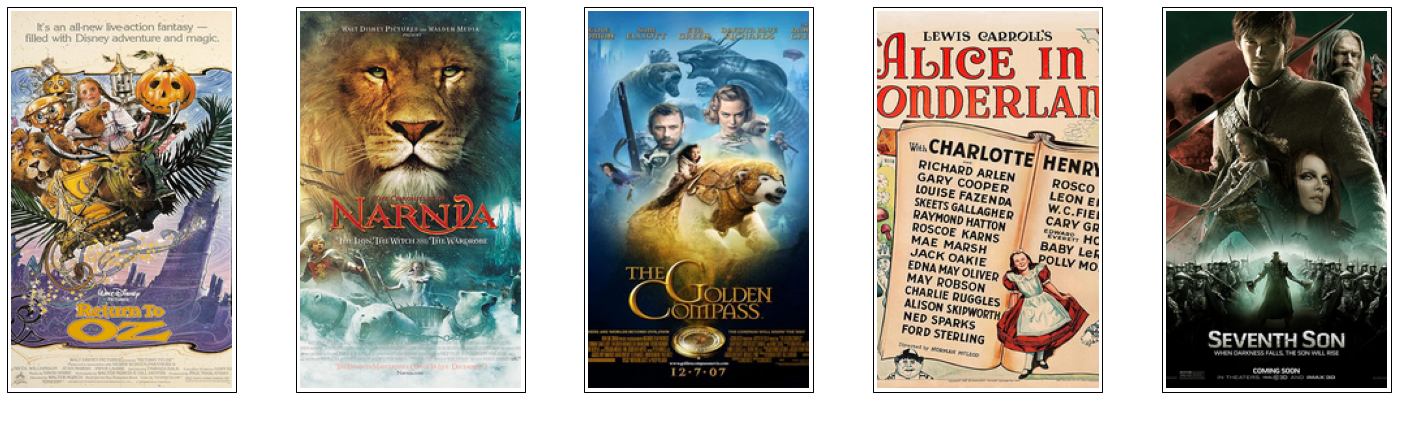

In [ ]:
#test avec Jumanji (1995)

recommandation_sys_1()



In [ ]:
links_movies

,movieId,title,genres,nombre_genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed),imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,2,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0113041,11862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,5476944,432131.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,5914996,445030.0
9739,193585,Flint (2017),Drama,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6397426,479308.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,8391976,483455.0
